In [8]:
%pylab inline
from astropy import constants
from astropy import units 
font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [13]:
def H(z, Omega0, H_0):
    Lambda0 = 1. - Omega0
    return H_0*(Omega0*(1+z)**3 - (Omega0+Lambda0-1)*(1+z)**2 + Lambda0)**0.5

def Omega_z(z,Omega0, H_0):
    return Omega0 * (1+z)**3 * (H_0/H(z,Omega0, H_0))**2

def rho_crit(G, z, Omega0, H_0):
    H2 = H(z, Omega0, H_0)**2
    rho = 3*H2 / (8*np.pi*G)
    return rho

def rvir(Mvir, z):
    Mvir = Mvir * units.Msun
    G = constants.G
    G = G.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
    H_0 = 70*units.km / (units.s * units.Mpc)# km/sMpc
    H_0 = H_0.to(units.Mpc / (units.s * units.Mpc))
    Omega0 = 0.27
    Deltavir = 360
    pcrit = rho_crit(G, z, Omega0 , H_0)
    Rvir = ( 3*Mvir / (4 * np.pi * Deltavir * pcrit * Omega0) )**(1/3.)
    return Rvir

In [32]:
def vc_plummer(a, r, M):
    #a = a*units.kpc
    vc = np.sqrt(G*M*( r**2/(r**2 + a**2)**(3/2.)))
    #vc = vc.to(units.km / units.s)
    return vc

def vc_Hernquist(a, r, M):
    #a = a*units.kpc
    vc = np.sqrt(G*M*r/(r+a)**2)
    #vc = vc.to(units.km / units.s)
    return vc

def vc_NFW(c, r, M, G):
    H_0 = 70#*units.km / (units.s * units.Mpc)
    pcrit = rho_crit(G, 0, 0.27, H_0)
    rvir = (3* M / (360*pcrit*4*np.pi) )**(1/3.)
    #rvir = rvir.to(units.kpc)
    a = rvir / c
    #print a
    vc = np.sqrt( ( 2*M*G* (log(1 + r/a) - (r/a) / (1 + r/a)) )/r )
    #vc = vc.to(units.km / units.s)
    return vc

def MN_vc(a, b, G, M, r, z=0):
    #z = z*units.kpc
    #a = a*units.kpc
    #b = b*units.kpc
    #r = r*units.kpc
    vc = r*np.sqrt(G*M / ( (r**2 + (a + b)**2)**(3/2.0) ))
    return vc

In [33]:
r = np.linspace(0, 30)
G = constants.G
G = G.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
G = G.value
H_0 = 70
rb = np.linspace(0, 10)
Mb = 1E11
c = 11
MNFW = 1E12 
MMN = 1E11
a = 1
b = 1
vc = vc_Hernquist(5, rb, Mb) + vc_NFW(c, r, MNFW, G) + MN_vc(a, b, G, MMN, r, z=0)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide


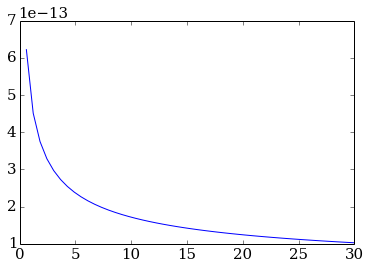

In [31]:
plot(r, vc)